# This is trial for comparing evaluation result

1. Correlation map difference with control experiment
2. RMSE map difference with control experimnet
3. AUC map difference with control experiment
4. ROC curve of AUC_mean of all experiments
5. TF_bar of all experiments
6. bimodal_bar of all experiments

## [experiment] world_5x5_continuous

### MJJASO, JJA, JAS, ASO

- control (msot)
- soil moisture
- snow coverage
- sea surface temperature
- temperature of soil layer
- SST + MOISTURE
- SST + SNOW
- SST + SOIL TEMPERATURE

## [experiment] thailand_1x1_continuous

### MJJASO, JJA, JAS, ASO

- control (msot)
- soil moisture
- snow coverage
- sea surface temperature
- temperature of soil layer
- SST + MOISTURE
- SST + SNOW
- SST + SOIL TEMPERATURE

In [11]:
import numpy as np
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs

In [12]:
# world_5x5_continuous MJJASO

result_msot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                     f"/predictors_coarse_std_Apr_msot-pr_5x5_coarse_std_MJJASO_world" \
                     f"/epoch100_batch256_seed1.npy"
val_msot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                  f"/predictors_coarse_std_Apr_msot-pr_5x5_coarse_std_MJJASO_world.pickle"

result_m_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_m-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_m_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                  f"/predictors_coarse_std_Apr_m-pr_5x5_coarse_std_MJJASO_world.pickle"

result_s_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_s-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_s_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_s-pr_5x5_coarse_std_MJJASO_world.pickle"

result_o_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_o-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_o_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_o-pr_5x5_coarse_std_MJJASO_world.pickle"

result_t_MJJASO =    f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                     f"/predictors_coarse_std_Apr_t-pr_5x5_coarse_std_MJJASO_world" \
                     f"/epoch100_batch256_seed1.npy"
val_t_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_t-pr_5x5_coarse_std_MJJASO_world.pickle"

result_mo_MJJASO =   f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
              f"/predictors_coarse_std_Apr_mo-pr_5x5_coarse_std_MJJASO_world" \
              f"/epoch100_batch256_seed1.npy"
val_mo_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_mo-pr_5x5_coarse_std_MJJASO_world.pickle"

result_so_MJJASO =  f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                    f"/predictors_coarse_std_Apr_so-pr_5x5_coarse_std_MJJASO_world" \
                    f"/epoch100_batch256_seed1.npy"
val_so_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_so-pr_5x5_coarse_std_MJJASO_world.pickle"

result_ot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                   f"/predictors_coarse_std_Apr_ot-pr_5x5_coarse_std_MJJASO_world" \
                   f"/epoch100_batch256_seed1.npy"
val_ot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_ot-pr_5x5_coarse_std_MJJASO_world.pickle" 

In [13]:
# loading validation input and predicted result
def load_pred(path, result_path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    x_val, y_val = data['x_val'], data['y_val']
    pred_arr = np.squeeze(np.load(result_path))
    return x_val, y_val, pred_arr

def correlation(pred, y_val, grid_num=1728, lat_grid=24, lon_grid=72):
    corr = []
    pred_arr = np.squeeze(pred)
    for i in range(grid_num):
        y_val_px = y_val[:, i]
        corr_i = np.corrcoef(pred_arr[i, :], y_val_px)
        corr.append(np.round(corr_i[0, 1], 2))
        
    # calculate 95% intervals
    n = len(corr)
    sample_mean = np.mean(corr)
    sample_var = stats.tvar(corr)
    interval = stats.norm.interval(alpha=0.95,
                                   loc=sample_mean,
                                   scale=np.sqrt(sample_var/n))
    print(f"corr_95%reliable_mean {sample_mean} spans {interval}")
    
    # view corr heat-map
    corr = np.array(corr)
    corr = corr.reshape(lat_grid, lon_grid)
    return corr

In [32]:
def draw_corr_diff(diff, vmin=-1, vmax=1, name='msot - m'):
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-180, 180, -60, 60)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    fig, ax = plt.subplots()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(diff,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     norm=norm,
                     cmap='seismic')
    fig.colorbar(mat, ax=ax)
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.title(f"correlation coefficient [{name}]")
    plt.legend()
    plt.show()

/tmp/ipykernel_23595/1080450096.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=projection)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


corr_95%reliable_mean 0.8869618055555556 spans (0.886000197830046, 0.8879234132810652)
corr_95%reliable_mean 0.8381076388888888 spans (0.8370957020297752, 0.8391195757480024)


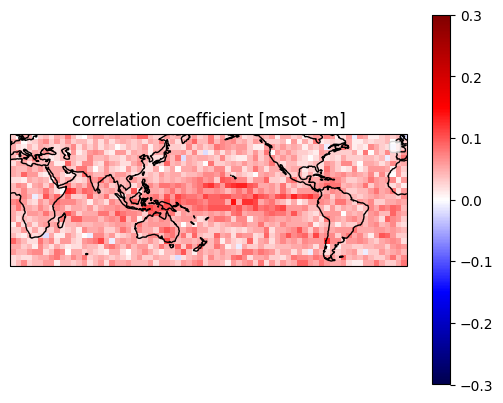

In [34]:
input_path_list = [val_msot_MJJASO,
                   val_m_MJJASO,
                   val_s_MJJASO,
                   val_o_MJJASO,
                   val_t_MJJASO]
result_path_list = [result_msot_MJJASO,
                    result_m_MJJASO,
                    result_s_MJJASO,
                    result_o_MJJASO,
                    result_t_MJJASO]
name_list = ['msot', 'm', 's', 'o', 't']
color_list = ['dimgrey', 'olive', 'powderblue', 'dodgerblue', 'goldenrod']

# calc
_, y_val_msot, pred_msot = load_pred(input_path_list[0], result_path_list[0])
_, y_val_m, pred_m = load_pred(input_path_list[1], result_path_list[1])

corr_msot = correlation(pred_msot, y_val_msot)
corr_m = correlation(pred_m, y_val_m)
diff = corr_msot - corr_m
    
# draw comparison graphs
draw_corr_diff(diff, vmin=-0.3, vmax=0.3, name='msot - m')

/tmp/ipykernel_23595/1080450096.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=projection)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


corr_95%reliable_mean 0.8869618055555556 spans (0.886000197830046, 0.8879234132810652)
corr_95%reliable_mean 0.8201041666666669 spans (0.8190167678867956, 0.8211915654465382)


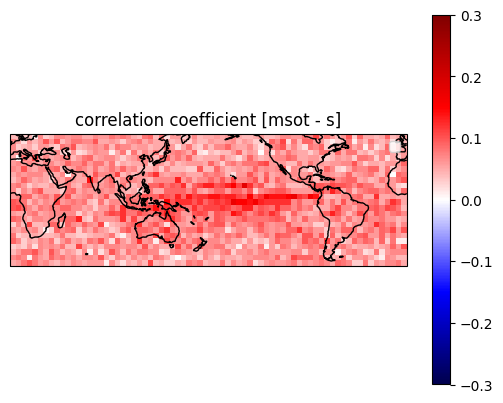

In [35]:
_, y_val_msot, pred_msot = load_pred(input_path_list[0], result_path_list[0])
_, y_val_m, pred_m = load_pred(input_path_list[4], result_path_list[4])

corr_msot = correlation(pred_msot, y_val_msot)
corr_m = correlation(pred_m, y_val_m)

diff = corr_msot - corr_m
    
# draw comparison graphs
draw_corr_diff(diff, vmin=-0.3, vmax=0.3, name='msot - s')